In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [29]:
import re
from nltk.tokenize import sent_tokenize, word_tokenize, regexp_tokenize, TweetTokenizer

In [12]:
# datasets used
with open('./grail.txt', 'r') as f:
    holy_grail = f.read()
    grail1 = re.split('SCENE 2:', holy_grail)[0]

# Introduction to regular expressions

## Practicing regular expressions: `re.split()` and `re.findall()`

In [6]:
my_string = "Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"
my_string

"Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"

In [9]:
# write a pattern to match sentence endings
sentence_endings = r'[.?!]'

# split my_string on sentence endings
print(f'Split on sentence endings:\n{re.split(sentence_endings, my_string)}\n')

# find all capitalized words in my_string
capitalized = r'[A-Z]\w+'
print(f'Capitalized words:\n{re.findall(capitalized, my_string)}\n')

# split my_string on spaces
spaces = r'\s+'
print(f'Split on spaces:\n{re.split(spaces, my_string)}\n')

# find all digits in my_string
digits = r'\d+'
print(f'Digits:\n{re.findall(digits, my_string)}')

Split on sentence endings:
["Let's write RegEx", "  Won't that be fun", '  I sure think so', '  Can you find 4 sentences', '  Or perhaps, all 19 words', '']

Capitalized words:
['Let', 'RegEx', 'Won', 'Can', 'Or']

Split on spaces:
["Let's", 'write', 'RegEx!', "Won't", 'that', 'be', 'fun?', 'I', 'sure', 'think', 'so.', 'Can', 'you', 'find', '4', 'sentences?', 'Or', 'perhaps,', 'all', '19', 'words?']

Digits:
['4', '19']


# Introduction to tokenization

In [15]:
grail1

"SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!  [clop clop clop] \nSOLDIER #1: Halt!  Who goes there?\nARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!\nSOLDIER #1: Pull the other one!\nARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.\nSOLDIER #1: What?  Ridden on a horse?\nARTHUR: Yes!\nSOLDIER #1: You're using coconuts!\nARTHUR: What?\nSOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.\nARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?\nARTHUR: We found them.\nSOLDIER #1: Found them?  In Mercea?  The coconut's tropical!\nARTHUR: What do you mean?\nSOLDIER #1: Well, this is a t

## Word tokenization with `nltk`

In [16]:
# split grail1 into sentences
sentences = sent_tokenize(grail1)

# tokenize the words in the fourth sentence
tokenized_sent = word_tokenize(sentences[3])

# make a set of unique tokens in the entire scene
unique_tokens = set(word_tokenize(grail1))

print(f'unique tokens:\n{unique_tokens}')

unique tokens:
{'two', "'re", 'grip', ',', 'coconuts', 'use', 'SCENE', 'It', 'but', 'carry', '--', 'Well', 'strangers', 'velocity', 'are', 'could', 'who', 'where', 'Am', 'Please', 'under', 'Mercea', 'knights', 'Are', 'weight', 'A', 'our', 'and', 'Halt', 'Patsy', 'ratios', 'line', 'may', 'why', 'house', 'simple', "'d", 'back', 'horse', 'covered', 'one', 'in', 'suggesting', '.', 'since', 'its', 'on', 'That', 'swallows', 'this', 'all', 'zone', '!', 'Will', 'Who', 'from', 'to', 'Arthur', 'join', 'grips', 'What', 'goes', "'ve", 'migrate', 'Not', 'of', 'course', 'snows', 'son', 'Found', 'breadth', 'together', 'creeper', 'tropical', 'You', 'climes', 'defeator', 'right', "'", 'court', 'matter', 'there', 'temperate', '1', 'Pendragon', 'forty-three', 'halves', 'lord', 'Uther', 'bangin', 'feathers', 'me', 'Listen', 'do', 'interested', '...', 'search', 'non-migratory', 'tell', 'Whoa', 'servant', 'Camelot', 'here', "'em", 'ounce', 'through', 'get', '?', 'will', 'your', 'point', 'times', 'agree', 'd

## More regex with `re.search()`

In [20]:
# search for the occurences in grail1
match = re.search('coconuts', grail1)

# print the start and end indices
print(f'start idx: {match.start()} end idx: {match.end()}')

start idx: 580 end idx: 588


In [26]:
# write a pattern to search for anything in square brackets
pattern1 = r'\[.*]'

# find the first text in square brackets
print(re.search(pattern1, grail1))

<re.Match object; span=(9, 32), match='[wind] [clop clop clop]'>


In [28]:
# find the script notation at the beginning of the fourth sentence
pattern2 = r'[A-Z]+:'
print(re.match(pattern2, sentences[3]))

<re.Match object; span=(0, 7), match='ARTHUR:'>


# Advanced tokenization with `nltk` and `re`

## Regex with `nltk` tokenization

In [30]:
tweets = ['This is the best #nlp exercise ive found online! #python',
          '#NLP is super fun! <3 #learning',
          'Thanks @datacamp :) #nlp #python']

In [31]:
# define a regex pattern to find hashtags
pattern1 = r'#\w+'
# find the hashtags in the first tweet
hashtags = regexp_tokenize(tweets[0], pattern1)
print(hashtags)

['#nlp', '#python']


In [34]:
# write a pattern that matches both mentions and hashtags
pattern2 = r'([#@]\w+)'
mentions_hashtags = regexp_tokenize(tweets[-1], pattern2)
print(mentions_hashtags)

['@datacamp', '#nlp', '#python']


In [35]:
# use TweetTokenizer to tokenize all tweets into one list
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]
print(all_tokens)

[['This', 'is', 'the', 'best', '#nlp', 'exercise', 'ive', 'found', 'online', '!', '#python'], ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning'], ['Thanks', '@datacamp', ':)', '#nlp', '#python']]


## Non-ascii tokenization

In [36]:
german_text = 'Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕'

In [39]:
# tokenize all words in the german text
all_words = word_tokenize(german_text)
print(f'tokenized words:\n{all_words}\n')

# tokenize only capital words
capital_words = r'[A-ZÜ]\w+'
print(
    f'tokenized capitalized words:\n{regexp_tokenize(german_text, capital_words)}\n')

# tokenize only emoji
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
print(f'tokenized emoji:\n{regexp_tokenize(german_text, emoji)}')

tokenized words:
['Wann', 'gehen', 'wir', 'Pizza', 'essen', '?', '🍕', 'Und', 'fährst', 'du', 'mit', 'Über', '?', '🚕']

tokenized capitalized words:
['Wann', 'Pizza', 'Und', 'Über']

tokenized emoji:
['🍕', '🚕']


# Charting word length with `nltk`

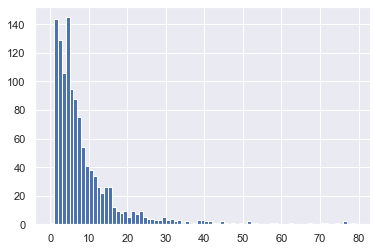

In [49]:
# split the script into lines
lines = holy_grail.split('\n')

# replace all script lines for speaker
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]

# tokenize each line
tokenized_lines = [regexp_tokenize(s, r'\w+') for s in lines]

# make a freq list of lengths
line_num_words = [len(t_line) for t_line in tokenized_lines]

# plot a histogram
plt.hist(line_num_words, list(range(80)))

# show the plot
plt.show()